<a href="https://colab.research.google.com/github/carloseducorinto/Agents/blob/main/Simple_Agent_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI Agent From Scratch With Python** (first example)

** We're going to learn about AI agents, their functionalities, and how to build them from scratch without external services, plugins, or libraries.**

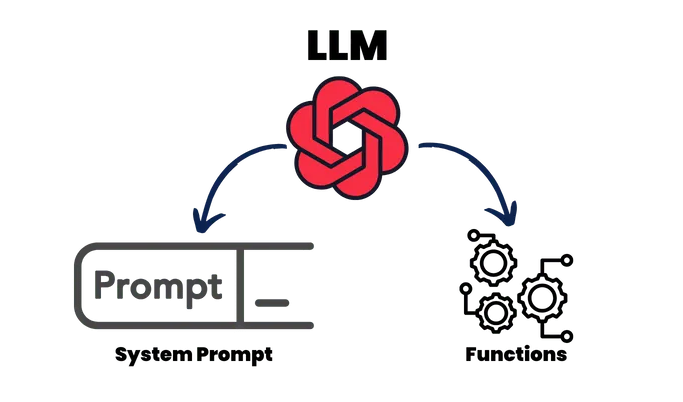

The get_response_time function is a **tool** for the agent to simulate the response time when accessing different websites. By returning specific response times for certain URLs and a default time for others, it enables the **agent to take action** and provide estimated response times upon request.

In [1]:
def get_response_time(url):
    if url == 'google.com':
        return 0.5
    elif url == 'apple.com':
        return 0.2
    elif url == 'medium.com':
        return 0.8
    else:
        return 1.0  # Default response time for other URLs

**The provided prompt below is the core of the AI agent's operational logic. It defines a structured loop of Thought, Action, PAUSE, and Action_Response, guiding the agent's decision-making process.**


**Thought**: The agent analyzes the question it has been asked to understand the task.

**Action**: The agent performs one of its available actions, such as get_response_time, to gather necessary information.

**PAUSE**: The agent pauses, awaiting the result of the action it performed.

**Action_Response**: The agent receives the result of the action and then uses this information to formulate a final answer.

In [2]:
system_prompt = """

You run in a loop of Thought, Action, PAUSE, Action_Response.
At the end of the loop you output an Answer.

Use Thought to understand the question you have been asked.
Use Action to run one of the actions available to you - then return PAUSE.
Action_Response will be the result of running those actions.

Your available actions are:

get_response_time:
e.g. get_response_time: learnwithhasan.com
Returns the response time of a website

Example session:

Question: what is the response time for learnwithhasan.com?
Thought: I should check the response time for the web page first.
Action:

{
  "function_name": "get_response_time",
  "function_parms": {
    "url": "apple.com"
  }
}

PAUSE

You may be called  with this:

Action_Response: 0.5

You then output:

Answer: The response time for learnwithhasan.com is 0.5 seconds.


extract_data_from_ticker:
e.g. extract_data_from_ticker: CTGP34
Returns the stock price information from the last 5 days

Example session:

Question: What is the stock quotation for CTGP34?
Thought: I should check the quotation for the ticker first.
Action:

{
  "function_name": "extract_data_from_ticker",
  "function_parms": {
    "ticker_symbol": "CTGP34"
  }
}

PAUSE

You may be called  with this:

Action_Response:

                Open	        High	   Low	    Close	       Adj Close	Volume
Date
2024-05-22	182.850006	183.800003	178.119995	180.110001	180.110001	88313500
2024-05-23	181.800003	181.899994	173.259995	173.740005	173.740005	71975500
2024-05-24	174.839996	180.080002	173.729996	179.240005	179.240005	65479700

You then output:

Answer: The quotation for Citigroup in the last 5 days are:
                Open	        High	   Low	    Close	       Adj Close	Volume
Date
2024-05-22	182.850006	183.800003	178.119995	180.110001	180.110001	88313500
2024-05-23	181.800003	181.899994	173.259995	173.740005	173.740005	71975500
2024-05-24	174.839996	180.080002	173.729996	179.240005	179.240005	65479700


In case you call the 2 functions, your answer should be like the one below:


Answer: The quotation for Citigroup in the last 5 days are:
                Open	        High	   Low	    Close	       Adj Close	Volume
Date
2024-05-22	182.850006	183.800003	178.119995	180.110001	180.110001	88313500
2024-05-23	181.800003	181.899994	173.259995	173.740005	173.740005	71975500
2024-05-24	174.839996	180.080002	173.729996	179.240005	179.240005	65479700

**********************************************************************************

The response time for learnwithhasan.com is 0.5 seconds.


"""

**The code initializes an OpenAI client and defines a function to generate text based on a given conversation using the OpenAI GPT-3.5-turbo model.**

In [ ]:
#!pip install OpenAI

In [7]:
import os
from google.colab import userdata
from openai import OpenAI
import yfinance as yf
import pandas as pd

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

openai_client = OpenAI()

def generate_text_with_conversation(messages, model = 'gpt-3.5-turbo'):
    response = openai_client.chat.completions.create(
        model = model,
        messages = messages
        )
    return response.choices[0].message.content

def extract_data_from_ticker(ticker_symbol):
  start_date = datetime.now() - pd.DateOffset(days=5)
  end_date= datetime.now()

  df = yf.download(ticker_symbol, start=start_date, end=end_date, progress=False)
  return df

**This code snippet sets up available actions for an AI agent, defines a user prompt, and prepares messages for the AI agent to process.**

In [8]:

# Available actions are here:
available_actions = {
    "get_response_time": get_response_time,
    "extract_data_from_ticker": extract_data_from_ticker
}

#user_prompt = 'What is the quotation for google  ?'
#user_prompt = 'What is response time for citigroup.com ?'
user_prompt = 'What is the quotation for google and also what is the response time of apple.com ?'


messages = [
    {'role': 'system', 'content': system_prompt},
    {'role': 'user', 'content': user_prompt},
]


**The code runs a loop to simulate a conversation between an AI agent and a user. It generates responses, extracts actions, executes those actions, and then continues based on the results.**



In [10]:
turn_count = 1
max_turns = 10

while turn_count < max_turns:
    print(f'Loop: {turn_count}' )
    print('------------------------------------')
    turn_count+=1

    response = generate_text_with_conversation(messages=messages, model='gpt-3.5-turbo')
    print(response)
    json_function = extract_json(response)
    #print(response)
    #print(json_function)

    if json_function:
        function_name = json_function[0]['function_name']
        function_parms = json_function[0]['function_parms']
        if function_name not in available_actions:
            raise Exception(f'Uknown Action: {function_name} : {function_parms}')
        print(f'-- running {function_name} : {function_parms} ')
        action_function = available_actions[function_name]

        # call the function
        result = action_function(** function_parms)
        function_result_message = f'Action_Response: {result}'
        messages.append({'role': 'user', 'content': function_result_message})
        print(function_result_message)

    else:
        break


Loop: 1
------------------------------------
Thought: I need to check the stock quotation for Google and the response time for Apple's website.

Action: 

1. {
  "function_name": "extract_data_from_ticker",
  "function_parms": {
    "ticker_symbol": "GOOGL"
  }
}

PAUSE

2. {
  "function_name": "get_response_time",
  "function_parms": {
    "url": "apple.com"
  }
}

PAUSE
-- running extract_data_from_ticker : {'ticker_symbol': 'GOOGL'} 


NameError: name 'datetime' is not defined

In [14]:
import re
import json
from pydantic import BaseModel, ValidationError
from typing import get_type_hints


def model_to_json(model_instance):
    """
    Converts a Pydantic model instance to a JSON string.

    Args:
        model_instance (YourModel): An instance of your Pydantic model.

    Returns:
        str: A JSON string representation of the model.
    """
    return model_instance.model_dump_json()

def extract_json(text_response):
    pattern = r'\{.*?\}'
    matches = re.finditer(pattern, text_response, re.DOTALL)
    json_objects = []
    #print('PASSEI PASSEI')

    for match in matches:
        json_str = extend_search_new(text_response, match.span())
        try:
            json_obj = json.loads(json_str)
            json_objects.append(json_obj)
        except json.JSONDecodeError:
            continue

    return json_objects if json_objects else None

def extend_search_new(text, span):
    start, end = span
    nest_count = 1  # Starts with 1 since we know '{' is at the start position
    for i in range(end, len(text)):
        if text[i] == '{':
            nest_count += 1
        elif text[i] == '}':
            nest_count -= 1
            if nest_count == 0:
                return text[start:i+1]
    return text[start:end]


def extract_json_old(text_response):
    # This pattern matches a string that starts with '{' and ends with '}'
    pattern = r'\{[^{}]*\}'

    matches = re.finditer(pattern, text_response)
    json_objects = []

    for match in matches:
        json_str = match.group(0)
        try:
            # Validate if the extracted string is valid JSON
            json_obj = json.loads(json_str)
            json_objects.append(json_obj)
        except json.JSONDecodeError:
            # Extend the search for nested structures
            extended_json_str = extend_search(text_response, match.span())
            try:
                json_obj = json.loads(extended_json_str)
                json_objects.append(json_obj)
            except json.JSONDecodeError:
                # Handle cases where the extraction is not valid JSON
                continue

    if json_objects:
        return json_objects
    else:
        return None  # Or handle this case as you prefer

def extend_search(text, span):
    # Extend the search to try to capture nested structures
    start, end = span
    nest_count = 0
    for i in range(start, len(text)):
        if text[i] == '{':
            nest_count += 1
        elif text[i] == '}':
            nest_count -= 1
            if nest_count == 0:
                return text[start:i+1]
    return text[start:end]

def json_to_pydantic(model_class, json_data):
    try:
        model_instance = model_class(**json_data)
        return model_instance
    except ValidationError as e:
        print("Validation error:", e)
        return None

def validate_json_with_model(model_class, json_data):
    """
    Validates JSON data against a specified Pydantic model.

    Args:
        model_class (BaseModel): The Pydantic model class to validate against.
        json_data (dict or list): JSON data to validate. Can be a dict for a single JSON object,
                                  or a list for multiple JSON objects.

    Returns:
        list: A list of validated JSON objects that match the Pydantic model.
        list: A list of errors for JSON objects that do not match the model.
    """
    validated_data = []
    validation_errors = []

    if isinstance(json_data, list):
        for item in json_data:
            try:
                model_instance = model_class(**item)
                validated_data.append(model_instance.dict())
            except ValidationError as e:
                validation_errors.append({"error": str(e), "data": item})
    elif isinstance(json_data, dict):
        try:
            model_instance = model_class(**json_data)
            validated_data.append(model_instance.dict())
        except ValidationError as e:
            validation_errors.append({"error": str(e), "data": json_data})
    else:
        raise ValueError("Invalid JSON data type. Expected dict or list.")

    return validated_data, validation_errors



# Example usage
# text_response = "Some text with JSON {\"key\": \"value\", \"nested\": {\"key2\": \"value2\"}} embedded in it."
# extracted_json = extract_json(text_response)
# print(extracted_json)

In [12]:
from datetime import datetime

In [13]:
start_date = datetime.now() - pd.DateOffset(days=5)
end_date= datetime.now()

df = yf.download('TSLA', start=start_date, end=end_date, progress=False)
df.head(5) # Only show first 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-06,174.600006,179.729996,172.729996,177.940002,177.940002,69887000
2024-06-07,176.130005,179.350006,175.580002,177.479996,177.479996,56161300
2024-06-10,176.059998,178.570007,173.169998,173.789993,173.789993,50445230
